# "Free-lunch" of Diversification

Imports and set magics:

In [2]:
#%pip install matplotlib-venn
#%pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import the StockData class from the dataproject module
from dataproject import StockData

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.144880,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.262035,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.959063,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.791507,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.149410,9.216420e+07,0.000893
75%,151.190002,153.287498,149.927498,151.339996,150.132580,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,108.118283,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.406659,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,45.317303,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,86.738316,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,96.132309,7.521250e+06,0.000738
75%,148.097504,149.277496,145.804996,147.580006,143.261757,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,178.740128,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317077,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094227,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771414,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784452,1.288415e+07,0.000692
75%,59.250000,59.650000,58.770000,59.237499,56.848194,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319363,6.784570e+07,0.064796


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,149.169995,150.257588,148.043805,149.182242,135.942377,7.726653e+06,0.000336
std,17.068344,17.169888,16.975243,17.077461,21.952289,6.861142e+06,0.011975
min,111.930000,112.800003,109.160004,111.139999,91.930862,2.114900e+06,-0.100379
25%,134.005005,134.935001,132.727501,133.937496,115.937908,5.449450e+06,-0.005004
50%,148.455002,149.465004,147.059998,148.284996,133.900093,6.558650e+06,0.000283
75%,163.702499,164.842499,162.482498,163.612499,156.653683,8.211125e+06,0.006020
max,185.100006,186.690002,184.179993,186.009995,175.705063,1.513195e+08,0.079977


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.703716,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.404639,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.361557,1.380540e+07,-0.153974
25%,27.090000,27.402500,26.737500,27.007500,24.238395,4.097392e+07,-0.009170
50%,29.990000,30.240000,29.660000,29.980000,27.200107,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.972404,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.471874,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.837206,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,31.058225,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.433586,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.749054,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.724358,6.578750e+06,0.000364
75%,122.610001,124.085001,120.985003,122.392500,120.247221,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,172.454773,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


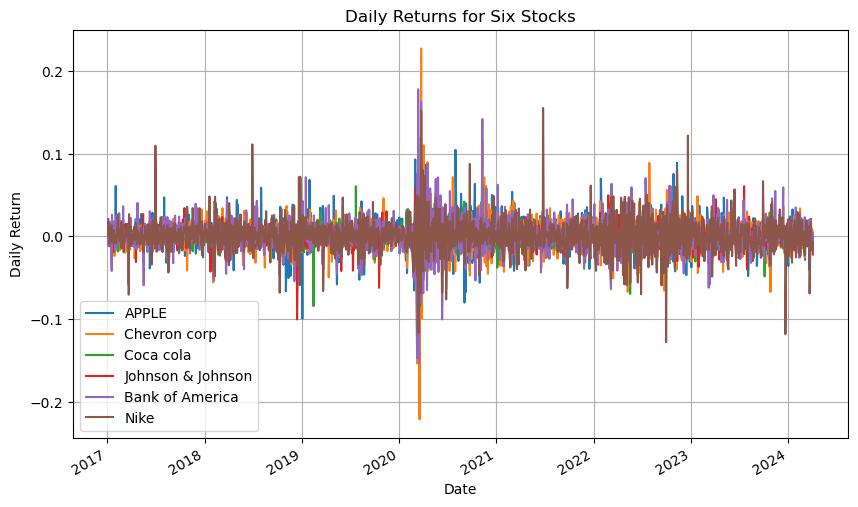

In [4]:
# We create an instance of the StockData class
SD = StockData(['AAPL', 'CVX', 'KO', 'JNJ', 'BAC', 'NKE'], 2017, 2024)

# We are calling this method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# We will plot the DataFrame
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# We are setting legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'Johnson & Johnson', 'Bank of America', 'Nike'])

plt.grid(True)
plt.show()

In [5]:
# We will set the display precision to 15 decimal points
pd.set_option('display.float_format', '{:.15f}'.format)

# We will call the method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()

# We are displaying the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)


,Expected Return (%)
Ticker,
Apple Inc.,0.118517558624752
Chevron Corporation,0.053565253833089
The Coca-Cola Company,0.039587019735721
Johnson & Johnson,0.033614186054268
Bank of America Corporation,0.057441828523680
"Nike, Inc.",0.053610277138915


In [6]:
# This is the code to where we display the covariance matrix for each portfolio
print("Covariance Matrix for Two Stocks:")
display(SD.calculate_covariance("two"))

print("Covariance Matrix for Four Stocks:")
display(SD.calculate_covariance("four"))

print("Covariance Matrix for Six Stocks:")
display(SD.calculate_covariance("six"))


Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000352568509119,0.000127784828512
CVX,0.000127784828512,0.000392115356226


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,JNJ
AAPL,0.000352568509119,0.000127784828512,0.000087696116774,0.000083040079201
CVX,0.000127784828512,0.000392115356226,0.000099501924492,0.000084511499894
KO,0.000087696116774,0.000099501924492,0.000143752637850,0.000075451178384
JNJ,0.000083040079201,0.000084511499894,0.000075451178384,0.000143389710886


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,0.000352568509119,0.000127784828512,0.000087696116774,0.000083040079201,0.000165280734712,0.000177928542854
CVX,0.000127784828512,0.000392115356226,0.000099501924492,0.000084511499894,0.000245200987873,0.000142291757604
KO,0.000087696116774,0.000099501924492,0.000143752637850,0.000075451178384,0.000111106147735,0.000093978101784
JNJ,0.000083040079201,0.000084511499894,0.000075451178384,0.000143389710886,0.000090695600298,0.000075580409944
BAC,0.000165280734712,0.000245200987873,0.000111106147735,0.000090695600298,0.000414458003045,0.000182308018564
NKE,0.000177928542854,0.000142291757604,0.000093978101784,0.000075580409944,0.000182308018564,0.000380371942858


In [7]:
# This code displays the inverse covariance matrix for each portfolio
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))

print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))

print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))


Invers Covariance Matrix for Two Stocks:
Number: two


,AAPL,CVX
AAPL,3216.207137628673991,-1048.116252058449390
CVX,-1048.116252058449390,2891.836133235290617


Invers Covariance Matrix for Four Stocks:
Number: four


,AAPL,CVX,KO,JNJ
AAPL,3623.037743218665128,-642.829920569536853,-1192.112156667371437,-1092.020846047503028
CVX,-642.829920569537080,3306.913002975074960,-1477.186065423706395,-799.472293695335225
KO,-1192.112156667371210,-1477.186065423706168,10896.121019644002445,-4172.495147234225442
JNJ,-1092.020846047503028,-799.472293695335225,-4172.495147234224532,10273.162326459434553


Invers Covariance Matrix for Six Stocks:
Number: six


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,4213.461740711541097,-131.448863892940182,-649.711467734616349,-934.828662594424145,-672.538633718142364,-1253.164060218722852
CVX,-131.448863892940352,4289.520467283118705,-856.033894081235303,-595.872318845731456,-2017.024476252608565,-246.523050121279255
KO,-649.711467734616349,-856.033894081235303,11436.857663694994699,-4009.170379629182207,-1020.174484034204056,-915.957836700509688
JNJ,-934.828662594424600,-595.872318845731456,-4009.170379629181753,10323.442912768299720,-358.345216604865470,-228.792368351406310
BAC,-672.538633718142137,-2017.024476252608110,-1020.174484034204511,-358.345216604865243,4579.119176395169234,-802.326335339689876
NKE,-1253.164060218723080,-246.523050121279425,-915.957836700509802,-228.792368351406196,-802.326335339689763,3963.737614799772018


In [8]:
# This code displays the one-vector belonging to each portfolio
display(SD.one_vector("two"))
display(SD.one_vector("four"))
display(SD.one_vector("six"))

array([[1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
# This code displays the z-vector belonging to each portfolio
display(SD.calculate_z_vector("two"))
display(SD.calculate_z_vector("four"))
display(SD.calculate_z_vector("six"))

Number: two


array([[2168.09088557],
       [1843.71988118]])

Number: four


array([[ 696.07481993],
       [ 387.42472329],
       [4054.32765032],
       [4209.17403948]])

Number: six


array([[ 571.77005255],
       [ 442.61786409],
       [3985.80960152],
       [4196.43396674],
       [-291.28996955],
       [ 516.97396407]])

In [18]:
# We again set the display to 15 decimal points
pd.set_option('display.float_format', '{:.15f}'.format)

# We get the weights
weights_two = SD.normalize_z_vector("two")
weights_four = SD.normalize_z_vector("four")
weights_six = SD.normalize_z_vector("six")

# We create DataFrames with the weights and the stock names as the index
df_two = pd.DataFrame(weights_two, index=SD.tickers[:2], columns=["Weights of each stock"])
df_four = pd.DataFrame(weights_four, index=SD.tickers[:4], columns=["Weights of each stock"])
df_six = pd.DataFrame(weights_six, index=SD.tickers[:6], columns=["Weights of each stock"])

# We will display the DataFrames
display(df_two)
display(df_four)
display(df_six)

Number: two
Number: four
Number: six


,Weights of each stock
AAPL,0.540427007061502
CVX,0.459572992938498


two


,Weights of each stock
AAPL,0.074470389227628
CVX,0.041449092990142
KO,0.433757046698063
JNJ,0.450323471084167


,Weights of each stock
AAPL,0.060682541759711
CVX,0.046975487613036
KO,0.423018058589058
JNJ,0.445371838367248
BAC,-0.030914903050186
NKE,0.054866976721133


In [11]:
# This is the code where we check our results, to see if the calculations are correct
display(SD.check_results("two"))
display(SD.check_results("four"))
display(SD.check_results("six"))

Number: two


array([[1.],
       [1.]])

Number: four


array([[1.],
       [1.],
       [1.],
       [1.]])

Number: six


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [12]:
# This code displays the expected return for each portfolio
print("Expected return for two stock portfolio:")
display(SD.portfolio_expected_return_two)
print("Expected return for four stock portfolio:")
display(SD.portfolio_expected_return_four)
print("Expected return for six stock portfolio:")
display(SD.portfolio_expected_return_six)


Expected return for two stock portfolio:


0.0886672189321866

Expected return for four stock portfolio:


0.04335468283812161

Expected return for six stock portfolio:


0.04259066324983087

In [13]:
# We need to call an instance of the StockData class to calculate the portfolio variances
SD.calculate_portfolio_variances()

# We print the portfolio variances
print("Portfolio variance for two stock portfolio:", SD.portfolio_variance_two)
print("Portfolio variance for four stock portfolio:", SD.portfolio_variance_four)
print("Portfolio variance for six stock portfolio:", SD.portfolio_variance_six)

Portfolio variance for two stock portfolio: 0.0002492640002586635
Portfolio variance for four stock portfolio: 0.00010698618466722476
Portfolio variance for six stock portfolio: 0.00010613102503156724


In [14]:
# We need to call an instance of the StockData class to calculate the portfolio standard deviations
SD.calculate_portfolio_std_devs()

# We print the portfolio standard deviations
print("Portfolio standard deviation for two stock portfolio:", SD.portfolio_std_dev_two)
print("Portfolio standard deviation for four stock portfolio:", SD.portfolio_std_dev_four)
print("Portfolio standard deviation for six stock portfolio:", SD.portfolio_std_dev_six)

Portfolio standard deviation for two stock portfolio: 0.015788096790261438
Portfolio standard deviation for four stock portfolio: 0.010343412621916655
Portfolio standard deviation for six stock portfolio: 0.010301991313894962


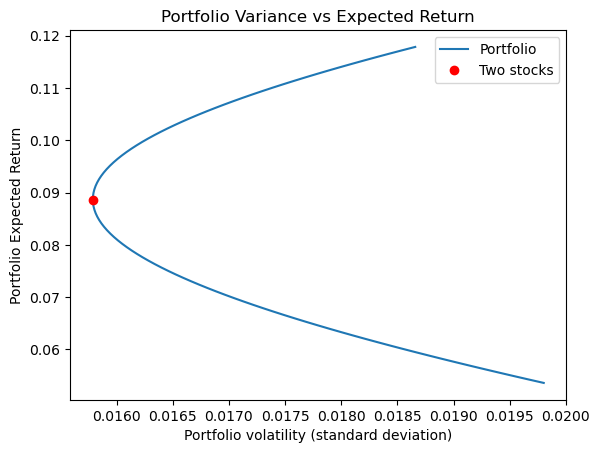

In [15]:
# We create an array of weights from 0 to 1 with a step of 0.01
weights = np.arange(0, 1.0, 0.01)

# We initialize lists to store the portfolio variances, expected returns and the volatility
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []

# We will loop over the weights
for w in weights:
    # We create the weight vector
    weight_vector = np.array([w, 1 - w])

    # We calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector.T, np.dot(SD.calculate_covariance("two"), weight_vector))
    portfolio_variances.append(portfolio_variance)

    # We calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)

    # We calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector, SD.two_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)

# We convert the lists of volatility and expected returns to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)

# We are adding our pre-calculated expected return and variance (red-dot)
precalculated_std_dev_two = SD.portfolio_std_dev_two
precalculated_expected_return_two = SD.portfolio_expected_return_two

# We plot the pre-calculated expected return and volatility and the new calculated expected return and volatility
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_two, precalculated_expected_return_two, 'ro', label='Two stocks')

# We add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')

plt.legend()
plt.show()


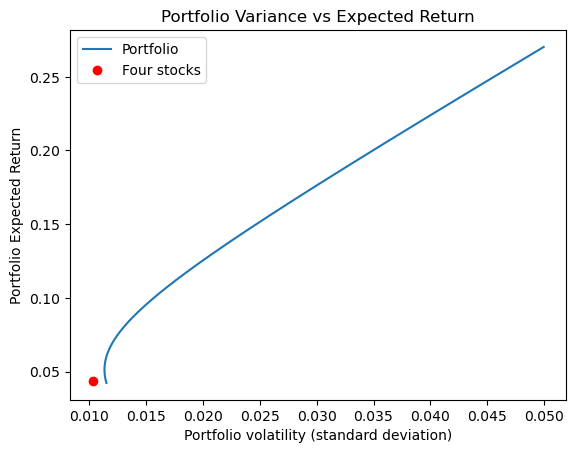

In [16]:
# We create an array of weights from 0 to 3 with a step of 0.01
weights_four = np.arange(0, 3.0, 0.01)

# We initialize lists to store the portfolio variances, expected returns and the volatility
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []

# We loop over the weights
for w in weights_four:
    # We create the weight vector, so each stock is equally weighted
    w1 = w
    w2 = (1 - w) / 3
    w3 = (1 - w) / 3
    w4 = (1 - w) / 3
   
    weight_vector_four = np.array([w1, w2, w3, w4])

    # We calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector_four.T, np.dot(SD.calculate_covariance("four"), weight_vector_four))
    portfolio_variances.append(portfolio_variance)

    # We calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)

    # We calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector_four, SD.four_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)

# We convert the lists of volatility and expected returns to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)

# We add our pre-calculated expected return and volatility
precalculated_std_dev_four = SD.portfolio_std_dev_four
precalculated_expected_return_four = SD.portfolio_expected_return_four

# We create the plot
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_four, precalculated_expected_return_four, 'ro', label='Four stocks')

# We add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')

plt.legend()
plt.show()


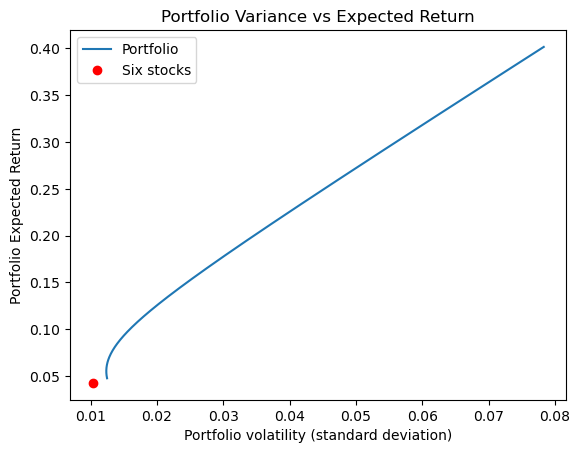

In [17]:
# We create an array of weights from 0 to 5 with a step of 0.01
weights_six = np.arange(0, 5.0, 0.01)

# We initialize lists to store the portfolio variances, expected returns and the volatility
portfolio_variances = []
portfolio_expected_returns = []
portfolio_volatilities = []

# We loop over the weights
for w in weights_six:
    # We create the weight vector so each stock is equally weighted
    w1 = w
    w2 = (1 - w) / 5
    w3 = (1 - w) / 5
    w4 = (1 - w) / 5
    w5 = (1 - w) / 5
    w6 = (1 - w) / 5

    weight_vector_six = np.array([w1, w2, w3, w4, w5, w6])

    # We calculate the portfolio variance
    portfolio_variance = np.dot(weight_vector_six.T, np.dot(SD.calculate_covariance("six"), weight_vector_six))
    portfolio_variances.append(portfolio_variance)

    # We calculate the portfolio volatility
    portfolio_volatility = np.sqrt(portfolio_variance)
    portfolio_volatilities.append(portfolio_volatility)

    # We calculate the portfolio expected return
    portfolio_expected_return = np.dot(weight_vector_six, SD.six_stock_vector)
    portfolio_expected_returns.append(portfolio_expected_return)

# We convert the lists of volatility and expected return to numpy arrays
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_expected_returns = np.array(portfolio_expected_returns)

# We add our pre-calculated expected return and volatility
precalculated_std_dev_six = SD.portfolio_std_dev_six
precalculated_expected_return_six = SD.portfolio_expected_return_six

# We create the plot
plt.plot(portfolio_volatilities, portfolio_expected_returns, label='Portfolio')
plt.plot(precalculated_std_dev_six, precalculated_expected_return_six, 'ro', label='Six stocks')

# We add labels and title
plt.xlabel('Portfolio volatility (standard deviation)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Variance vs Expected Return')

plt.legend()
plt.show()


# Conclusion

After reviewing our findings, it appears that his theory holds true in terms of risk reduction. However, our project's results indicate a decline in the expected return when comparing a two-stock portfolio to a six-stock portfolio. Nonetheless, we believe that if we were to include even more stocks, say 30, the outcomes would further support his theory. We anticipate that the expected daily returns would converge towards or even exceed those of the two-stock portfolio while concurrently mitigating risk.